##Loader

In [ ]:
!pip install latextable
!pip install names
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for latextable: filename=latextable-0.3.0-py3-none-any.whl size=7255 sha256=b676b4d5be90531ccf5e53cf7d3e378b3458ca128842e4a2989f3863a14b0ac9
  Stored in directory: /root/.cache/pip/wheels/a3/8d/a3/41e5c8fb7490c6e93ceb64ca1740f172b7ea837fe42ac41ce0
Successfully built latextable
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789 kB 5.0 MB/s 
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803697 sha256=dc872926b1a116b4b78890aad5020b3175482e9af95606c95af4a9bd033a2a65
  Stored in directory: /root/.cache/pip/wheels/05/ea/68/92f6b0669e478af9b7c3c524520d03050089e034edcc775c2b
Successfully built names
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.3 MB/s 
  Created whee

In [ ]:
import random
from random import randint, choice, sample

import latextable
from texttable import Texttable

from sympy import *

variables = 'a b c d m n p q r s t w x y'
variables = symbols(variables, real=True)
variables += (Symbol('z'),)
a,b,c,d,m,n,p,q,r,s,t,w,x,y,z = variables

###Functions and sequences

In [ ]:
class LinFunc():
    """
    Represent a linear function.

    Attributes
    ----------
        slope : number (int, float, or Rational)
        intercept : number
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set, default=S.Reals
        precision : int, default=2
    """

    def __init__(self, slope, pt, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct linear function object from slope and y-intercept.

        Parameters
        ----------
            slope : number (int, float, or Rational)
            pt : number or list
            variable : sympy symbol, default=x
            label : str, default='f'
            domain : sympy set, default=S.Reals
            precision : int, default=2
        """
        
        self.slope, pt = sympify([slope, pt])
        
        self.intercept = pt[1] - pt[0]*self.slope if type(pt)==list else pt
        self.expr = self.slope*variable + self.intercept

        self.variable = variable
        self.label = label
        self.domain = domain
        self.precision = precision
    
    def __str__(self):
        """Return LaTeX formatted slope-intercept form."""
        
        if self.slope in [0,1]:
            slopeInt = ''
        elif self.slope == -1:
            slopeInt = '-'
        else:
            slopeInt = latexify(self.slope, self.precision)
        slopeInt += latex(self.variable) if self.slope!=0 else '' 
        
        intercept = latexify(self.intercept, self.precision)
        if self.intercept>0 and self.slope!=0:
            slopeInt += ' + '
        if self.intercept!=0 or self.slope==0:
            slopeInt += intercept
            
        return slopeInt
    
    @classmethod
    def fromPts(cls, pt1, pt2, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct linear function object from two ordered pairs.

        Parameters
        ----------
            pt1, pt2 : list or tuple
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        pt1, pt2 = sympify([pt1, pt2])
        
        slope = (pt2[1] - pt1[1])/(pt2[0] - pt1[0])
        
        if pt1[0]==0:
            return cls(slope, pt1[1], variable, label, domain, precision)
        elif pt2[0]==0:
            return cls(slope, pt2[1], variable, label, domain, precision)
        else:
            return cls(slope, pt1, variable, label, domain, precision)

    def subs(self, input):
        """Return evaluation of function at input."""

        return self.expr.subs(self.variable, sympify(input))

    def subSet(self, preimage):
        """Return image of set."""

        return ImageSet(Lambda(self.variable, self.expr), preimage).intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        return self.subSet(self.domain)
        
    def solve(self, output):
        if self.slope == 0:
            return self.domain if output==self.intercept else None
        else:
            return (sympify(output)-self.intercept)/self.slope

    def getSlopeInt(self, notation='func'):
        """Return LaTeX formatted slope-intercept form."""

        if notation == 'func':
            return f'{self.label}({self.variable}) = ' + str(self)
        else:
            return notation + '=' + str(self)

    def getPtSlope(self, pt=1, notation='func'):
        """
        Return LaTeX formatted point-slope form.
        
        Parameters
        ---------
            pt : number or list/tuple
                Independent variable value or ordered pair.
            notation : string, default='func'
                LHS of equality, default returns function notation.
        """

        pt = sympify(pt)
        if type(pt)!=list:
            pt = [pt] + [self.subs(pt)]
        
        ptTex = latexify(pt, self.precision)
        
        if self.slope in [0,1]:
            ptSlope = ''
        elif self.slope == -1:
            ptSlope = '-'
        else:
            ptSlope = latexify(self.slope, self.precision)
            
        if self.slope!=0:
            ptSlope += r'\left(' + latex(self.variable)
            ptSlope += '+' + ptTex[0][1:] if pt[0]<0 else '-' + ptTex[0]
            ptSlope += r'\right)'
        
        if pt[1]>0 and self.slope!=0:
            ptSlope += ' + '
        if pt[1]!=0 or self.slope==0:
            ptSlope += ptTex[1]
        
        if notation == 'func':
            return fr'{self.label}({self.variable}) = ' + ptSlope
        else:
            return notation + '=' + ptSlope
            
    def getStdForm(self, notation='y', mult=1):
        if self.slope == 0:
            mult = nsimplify(self.intercept).q
        elif self.intercept == 0:
            mult = nsimplify(self.slope).q
        else:
            mult *= abs(lcm(nsimplify(self.slope).q, nsimplify(self.intercept).q))
        mult = -mult if self.slope<=0 else mult
        
        stdForm = latex(nsimplify(mult*self.slope*self.variable - mult)) + notation
        stdForm += '=' + latex(nsimplify(-mult*self.intercept))
        
        return stdForm
        
    def getTable(self, nums, vals=True, vertical=True, labels=None):
        """
        Return LaTeX formatted table at given positions with or without blanks.
        
        Parameters
        ----------
            nums : list of ints
            vals : bool or list of bools or nonempty/empty strings ('')
            vertical : bool, default=True
            labels : list, default=None
                Defaults are independent variable and function notation.
        """
        
        vals = len(nums)*[vals] if type(vals)==bool else vals
        images = [signify(latexify(self.subs(jj), self.precision)) for jj in nums]
        images = [jj if vals[count] else r'\phantom{' + jj + r'}' for count,jj in enumerate(images)]
        
        nums = sympify(nums)
        nums = [signify(latexify(jj, self.precision)) for jj in nums]
        
        if labels == None:
            labels = [signify(str(self.variable)), fr'${self.label}({self.variable})$']
        if vertical:
            header = labels
            rows = list(zip(nums,images))
        else:
            header = [labels[0]] + list(nums)
            rows = [[labels[1]] + images]
        
        return tableGenerator(header, rows)

In [ ]:
class ExpFunc():
    """
    Represent an exponential function.

    Attributes
    ----------
        base : number (int, float, or Rational)
        intercept : number
        shift : number
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set, default=S.Reals
        precision : int, default=2
    """

    def __init__(self, base, pt, shift=0, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct exponential function object from base, point/y-int, and vertical shift.

        Parameters
        ----------
            base : number (int, float, or Rational)
            intercept : number
            shift : number
            variable : sympy symbol, default=x
            label : str, default='f'
            domain : sympy set, default=S.Reals
            precision : int, default=2
        """

        self.base, pt, self.shift = sympify([base, pt, shift])

        self.lead = (pt[1]-self.shift)/Pow(self.base,pt[0]) if type(pt)==list else pt-self.shift
        self.expr = self.lead*(self.base**variable) + self.shift

        self.intercept = self.lead + self.shift
        
        self.variable = variable
        self.label = label
        self.domain = domain
        self.precision = precision
    
    def __str__(self):
        """Return LaTeX formatted standard form."""

        if self.lead == 1:
            string = ''
        elif self.lead == -1:
            string = '-'
        else:
            string = latexify(self.lead, self.precision)
            if type(self.base)==Integer and self.base>0:
                string += r' \cdot '
            
        if type(self.base)==Float or abs(self.base.q)>999:
            base = latexify(self.base, self.precision)
            string += fr'({base})^{self.variable}'
        else:            
            string += latex(self.base**self.variable)

        if self.shift != 0:
            string += ('+' + latexify(self.shift)) if self.shift>0 else latexify(self.shift)
            
        return string
    
    @classmethod
    def fromPts(cls, pt1, pt2, shift=0, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct exponential function object from two ordered pairs.

        Parameters
        ----------
            pt1, pt2 : list or tuple
            variable : sympy symbol, default=x
            label : str, default='f'
        """
        
        pt1, pt2, shift = sympify([pt1, pt2, shift])
        
        base = Pow((pt2[1]-shift)/(pt1[1]-shift), 1/(pt2[0]-pt1[0]))
        
        if pt1[0]==0:
            return cls(base, pt1[1], shift, variable, label, domain, precision)
        elif pt2[0]==0:
            return cls(base, pt2[1], shift, variable, label, domain, precision)
        else:
            return cls(base, pt1, shift, variable, label, domain, precision)

    def subs(self, input):
        """Return evaluation of function at input."""

        return self.expr.subs(self.variable, sympify(input))

    def subSet(self, preimage):
        """Return image of set."""

        return ImageSet(Lambda(self.variable, self.expr), preimage).intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        return self.subSet(self.domain)
        
    def solve(self, output):
        """Return preimage of given output."""
        
        soln = log((sympify(output)-self.shift)/self.lead, self.base)

        return soln if soln in S.Reals else None
    
    def getStdForm(self, notation='func'):
        """Return LaTeX formatted standard form."""

        if notation == 'func':
            return fr'{self.label}({self.variable}) = ' + str(self)
        else:
            return notation + '=' + str(self)
    
    def getBaseInt(self, notation='func'):
        """Return LaTeX formatted base-intercept form."""

        return self.getStdForm(notation)

    def getPtBase(self, pt=1, notation='func'):
        """
        Return LaTeX formatted point-base form.
        
        Parameter
        ---------
            pt : number or list/tuple
                Independent variable value or ordered pair.
            notation : string, default='func'
                LHS of equality, default returns function notation.
        """

        pt = sympify(pt)
        pt, lead = [pt, self.subs(pt)-self.shift] if type(pt) not in [list,tuple] else [pt[0], pt[1]-self.shift]
         
        if lead == 1:
            ptBase = ''
        elif lead == -1:
            ptBase = '-'
        else:
            ptBase = latexify(lead, self.precision)
            if type(self.base)==Integer and self.base>0:
                ptBase += r' \cdot '
            
        if type(self.base)==Float or abs(self.base.q)>999:
            base = latexify(self.base, self.precision)
            ptBase += fr'({base})^' + r'{' + latex(self.variable-pt) + r'}'
        else:
            ptBase += latex(self.base**(self.variable - pt))
        
        if self.shift != 0:
            ptBase += ('+' + latexify(self.shift)) if self.shift>0 else latexify(self.shift)
            
        if notation == 'func':
            return fr'{self.label}({self.variable}) = ' + ptBase
        else:
            return notation + '=' + ptBase
        
    def getTable(self, nums, vals=True, vertical=True, labels=None):
        """
        Return LaTeX formatted table at given positions with or without blanks.
        
        Parameters
        ----------
            nums : list of ints
            vals : bool or list of bools or nonempty/empty strings ('')
            vertical : bool, default=True
            labels : list, default=None
                Defaults are independent variable and function notation.
        """
        
        vals = len(nums)*[vals] if type(vals)==bool else vals
        images = [signify(latexify(self.subs(jj), self.precision)) for jj in nums]
        images = [jj if vals[count] else r'\phantom{' + jj + r'}' for count,jj in enumerate(images)]
        
        nums = sympify(nums)
        nums = [signify(latexify(jj, self.precision)) for jj in nums]
        
        if labels == None:
            labels = [signify(str(self.variable)), fr'${self.label}({self.variable})$']
        if vertical:
            header = labels
            rows = list(zip(nums,images))
        else:
            header = [labels[0]] + list(nums)
            rows = [[labels[1]] + images]
        
        return tableGenerator(header, rows)

In [ ]:
class QuadFunc():
    """
    Represent a quadratic function.

    Attributes
    ----------
        aa : number (int, float, or Rational)
        bb : number
        cc : number
        
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set, default=S.Reals
        precision : int, default=2
    """

    def __init__(self, aa, bb, cc, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from coefficients.

        Parameters
        ----------
            aa : number (int, float, or Rational)
            bb : number
            cc : number
            variable : sympy symbol, default=x
            label : str, default='f'
            domain : sympy set, default=S.Reals
            precision : int, default=2
        """
        
        self.aa, self.bb, self.cc = sympify([aa, bb, cc])
        
        self.expr = self.aa*variable**2 + self.bb*variable + self.cc

        self.variable = variable
        self.label = label
        self.domain = domain
        self.precision = precision
    
    def __str__(self):
        """Return LaTeX formatted standard form."""
        
        if self.aa in [0,1]:
            stdForm = ''
        elif self.aa == -1:
            stdForm = '-'
        else:
            stdForm = latexify(self.aa, self.precision)
        stdForm += latex(self.variable**2) if self.aa!=0 else '' 
        
        bb = latexify(self.bb, self.precision)
        if self.bb>0 and self.aa!=0:
            stdForm += ' + '
        if self.bb == -1:
            stdForm += ' - '
        elif self.bb not in [0,1]:
            stdForm += bb
        stdForm += latex(self.variable) if self.bb!=0 else ''
            
        cc = latexify(self.cc, self.precision)
        if self.cc>0 and (self.aa!=0 or self.bb!=0):
            stdForm += ' + '
        if self.cc!=0 or (self.aa==0 and self.bb==0):
            stdForm += cc
            
        return stdForm
    
    @classmethod
    def fromVertex(cls, aa, vertex, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from stretch factor (a) and vertex.

        Parameters
        ----------
            aa : number
            vertex : list or tuple
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        aa, hh, kk = sympify([aa, *vertex])
        
        return cls(aa, -2*aa*hh, a*hh**2+kk, variable, label, domain, precision)
    
    @classmethod
    def fromRoots(cls, aa, root1, root2, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from stretch factor (a) and roots.

        Parameters
        ----------
            aa : number
            root1, root2 : numbers
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        aa, root1, root2 = sympify([aa, root1, root2])
        
        return cls(aa, -aa*(root1+root2), a*root1*root2, variable, label, domain, precision)
    
    @classmethod
    def from2Pts(cls, aa, pt1, pt2, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from stretch factor (a) and 2 points.

        Parameters
        ----------
            aa : number
            pt1, pt2 : lists or tuples
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        aa, pt1, pt2 = sympify([aa, pt1, pt2])

        expr = aa*x**2 + b*x + c
        coeffs = solve([expr.subs(x,pt1[0])-pt1[1], expr.subs(x,pt2[0])-pt2[1]])
        
        return cls(aa, coeffs[b], coeffs[c], variable, label, domain, precision)
    
    @classmethod
    def from3Pts(cls, pt1, pt2, pt3, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from 3 points.

        Parameters
        ----------
            pt1, pt2, pt3 : lists or tuples
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        pt1, pt2, pt3 = sympify([pt1, pt2, pt3])

        expr = a*x**2 + b*x + c
        coeffs = solve([expr.subs(x,pt1[0])-pt1[1], expr.subs(x,pt2[0])-pt2[1], expr.subs(x,pt3[0])-pt3[1]])
        
        return cls(coeffs[a], coeffs[b], coeffs[c], variable, label, domain, precision)

    def subs(self, input):
        """Return evaluation of function at input."""

        return self.expr.subs(self.variable, sympify(input))

    def subSet(self, preimage):
        """Return image of set."""

        return ImageSet(Lambda(self.variable, self.expr), preimage).intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        return self.subSet(self.domain)
        
    def solve(self, output):
        return solve(self.expr.subs(self.variable,z)-output)

    def getVertex(self):
        hh = -Rational(self.bb,2*self.aa)
        return [hh, self.subs(hh)]

    def getRoots(self):
        return self.solve(0)

    def getStdForm(self, notation='func'):
        """Return LaTeX formatted standard form."""

        if notation == 'func':
            return f'{self.label}({self.variable}) = ' + str(self)
        else:
            return notation + '=' + str(self)

    # def getPtSlope(self, pt=1, notation='func'):
        # """
        # Return LaTeX formatted point-slope form.
        
        # Parameter
        # ---------
            # pt : number or list/tuple
                # Independent variable value or ordered pair.
        # """

        # pt = sympify(pt)
        # if type(pt)!=list:
            # pt = [pt] + [self.subs(pt)]
        
        # ptTex = latexify(pt, self.precision)
        
        # if self.slope in [0,1]:
            # ptSlope = ''
        # elif self.slope == -1:
            # ptSlope = '-'
        # else:
            # ptSlope = latexify(self.slope, self.precision)
            
        # if self.slope!=0:
            # ptSlope += r'\left(' + latex(self.variable)
            # ptSlope += '+' + ptTex[0][1:] if pt[0]<0 else '-' + ptTex[0]
            # ptSlope += r'\right)'
        
        # if pt[1]>0 and self.slope!=0:
            # ptSlope += ' + '
        # if pt[1]!=0 or self.slope==0:
            # ptSlope += ptTex[1]
        
        # if notation == 'func':
            # return fr'{self.label}({self.variable}) = ' + ptSlope
        # else:
            # return notation + '=' + ptSlope
        
    def getTable(self, nums, vals=True, vertical=True, labels=None):
        """
        Return LaTeX formatted table at given positions with or without blanks.
        
        Parameters
        ----------
            nums : list of ints
            vals : bool or list of bools or nonempty/empty strings ('')
        """
        
        vals = len(nums)*[vals] if type(vals)==bool else vals
        images = [signify(latexify(self.subs(jj), self.precision)) for jj in nums]
        images = [jj if vals[count] else r'\phantom{' + jj + r'}' for count,jj in enumerate(images)]
        
        nums = sympify(nums)
        nums = [signify(latexify(jj, self.precision)) for jj in nums]
        
        if labels == None:
            labels = [signify(str(self.variable)), fr'${self.label}({self.variable})$']
        if vertical:
            header = labels
            rows = list(zip(nums,images))
        else:
            header = [labels[0]] + list(nums)
            rows = [[labels[1]] + images]
        
        return tableGenerator(header, rows)

In [ ]:
class ArithSeq(LinFunc):
    """
    Represent an arithmetic sequence.

    Attributes
    ----------
        common : number (int, float, or Rational)
            Common difference.
        start : number
            First term (a_1 or f(1)).
        label : str, default='f'
        func : LinFunc
        terms : dict
    """

    def __init__(self, common, pt, variable=n, label='f', domain=S.Integers, precision=2):
        """
        Construct arithmetic sequence object from common difference and first term.

        Parameters
        ----------
            common : number (int, float, or Rational)
                Common difference.
            pt : number or list
                First term (a_1 or f(1)).
            label : str, default='f'
        """
        
        super().__init__(common, pt, variable, label, domain, precision)
        
        self.common = self.slope
        self.start = self.subs(1)
        self.terms = {0: self.intercept, 1: self.start, 2: self.subs(2), 3: self.subs(3)}
    
    def findTerm(self, num: int):
        """Return term at given index."""

        if num in self.terms.keys():
            return self.terms[num]
        else:
            return self.subs(num)
    
    def findTermNum(self, end):
        """Return index of given term."""

        if end in self.terms.values():
            return list(self.terms.keys())[list(self.terms.values()).index(end)]
        else:
            return self.solve(end)
    
    def getTerms(self, num: int, startnum=0):
        """Return dict of terms."""

        minNum = min(self.terms.keys())
        maxNum = max(self.terms.keys())
        if num > maxNum:
            for jj in range(maxNum+1, num+1):
                self.terms[jj] = self.terms[jj-1] + self.common
        if startnum < minNum:
            for jj in range(minNum-1, startnum-1, -1):
                self.terms[jj] = self.terms[jj+1] - self.common
        return self.terms
    
    def getExplicit(self, term=1):
        """
        Return LaTeX formatted explicit representation.
        
        Parameter
        ---------
            term : number or list/tuple
                Index of term or ordered pair.
        """

        return self.getSlopeInt() if term==0 else self.getPtSlope(term)
    
    def getRecursive(self, startnum=1):
        """
        Return LaTeX formatted recursive representation.

        Parameter
        ---------
            startnum : int
        """

        term = self.findTerm(startnum) if startnum!=1 else self.start
        recursive = fr'{self.label}(n) = {self.label}(n-1)'
        if self.common >= 0:
            recursive += ' + ' + latexify(self.common, self.precision)
        else:
            recursive += latexify(self.common, self.precision)
        recursive += fr',\quad {self.label}({startnum}) = {latexify(term, self.precision)}'
        return recursive
        
    def getSeqStr(self, nums=[1,2,3]):
        """
        Return LaTeX formatted list at given positions with or without blanks.
        
        Parameter
        ---------
            nums : list of ints or empty strings ('')
        """
        
        blank = r'\underline{\hspace{4mm}}'
        result = [latexify(self.findTerm(jj), self.precision) if type(jj)==int else blank for jj in nums]
        
        return (', ').join(result) + r', \ldots'

class GeoSeq(ExpFunc):
    """
    Represent a geometric sequence.

    Attributes
    ----------
        common : number (int, float, or Rational)
            Common ratio.
        start : number
            First term (a_1 or f(1)).
        label : str, default='f'
        func : ExpFunc
        terms : dict
    """

    def __init__(self, common, pt, shift=0, variable=n, label='f', domain=S.Integers, precision=2):
        """
        Construct geometric sequence object from common ratio and first term.

        Parameters
        ----------
            common : number (int, float, or Rational)
                Common ratio.
            start : number
                First term (a_1 or f(1)).
            label : str, default='f'
        """
        
        super().__init__(common, pt, shift, variable, label, domain, precision)

        self.common = self.base
        self.start = self.subs(1)
        self.terms = {0: self.intercept, 1: self.start, 2: self.subs(2), 3: self.subs(3)}
    
    def findTerm(self, num: int):
        """Return term at given index."""

        if num in self.terms.keys():
            return self.terms[num]
        else:
            return self.subs(num)
    
    def findTermNum(self, end):
        """Return index of given term."""

        if end in self.terms.values():
            return list(self.terms.keys())[list(self.terms.values()).index(end)]
        else:
            return self.solve(end)
    
    def getTerms(self, num: int, startnum=0):
        """Return list of terms."""

        minNum = int(min(self.terms.keys()))
        maxNum = int(max(self.terms.keys()))
        if num > maxNum:
            for jj in range(maxNum+1, num+1):
                self.terms[jj] = self.terms[jj-1]*self.common
        if startnum < minNum:
            for jj in range(minNum-1, startnum-1, -1):
                self.terms[jj] = Rational(self.terms[jj+1],self.common)
        return self.terms
    
    def getExplicit(self, term=1):
        """
        Return LaTeX formatted explicit representation.
        
        Parameter
        ---------
            term : number or list/tuple
                Index of term or ordered pair.
        """

        return self.getBaseInt() if term==0 else self.getPtBase(term)
    
    def getRecursive(self, startnum=1):
        """
        Return LaTeX formatted recursive representation.

        Parameter
        ---------
            startnum : int
        """

        term = self.findTerm(startnum) if startnum!=1 else self.start
        recursive = fr'{self.label}(n) = {latexify(self.common, self.precision)}\cdot {self.label}(n-1)'
        recursive += fr',\quad {self.label}({startnum}) = {latexify(term, self.precision)}'
        return recursive
        
    def getSeqStr(self, nums=[1,2,3]):
        """
        Return LaTeX formatted list at given positions with or without blanks.
        
        Parameter
        ---------
            nums : list of ints or empty strings ('')
        """
        
        blank = r'\underline{\hspace{4mm}}'
        result = [latexify(self.findTerm(jj), self.precision) if type(jj)==int else blank for jj in nums]
        
        return (', ').join(result) + r', \ldots'


In [ ]:
def getSeqAnswer(seq, prob='common', blanks=False, expr="latex", numTerms=6):
    if expr=="latex":
        answer = []
        if prob in ['common','all'] :
            answer.append('d = ' if type(seq)==ArithSeq else 'r = ')
            answer[0] += latex(seq.common)
        if prob in ['explicit','all']:
            answer.append(seq.getExplicit() + r' \quad\text{or}\quad ' + seq.getExplicit(0))
        if prob in ['recursive','all']:
            answer.append(seq.getRecursive() + r' \quad\text{or}\quad ' + seq.getRecursive(0))
        
        if blanks:
            answer.append(seq.getSeqStr(range(1,numTerms+1)))
        
        return answer if len(answer)>1 else answer[0]
    else:
        seq.getTerms(numTerms)
        answer = seq
        return answer

###Generators and printers

In [ ]:
def chooseFloat(package):
  floatA = random.choice(package)
  return floatA

def getFloat(min=-10,max=10,roundby=2):
  return round(random.uniform(min, max), roundby)

def getInt(min= -4, max = 4, exclude=[0]):
  intA = random.choice([x for x in range(min,max+1) if x not in exclude])
  return sympify(intA)

def getVar(exclude=None):
  return random.choice([vrbl for vrbl in variables if vrbl not in exclude])

def getFrac(denommin= -4, denommax= 4, numermin = 1, numbermax = 4 , exclude = 0):# exclude 1 in denom later
  top = random.choice([x for x in range(numermin,numbermax+1) if x != exclude])
  bot = random.choice([x for x in range(denommin,denommax+1) if x != exclude])
  return latex(simplify(Rational(top,bot),evaluate=False))

"""###Table"""

def tableGenerator(header, rows, cols_align=None, cols_valign=None, expr='latex', table_env=False, stretch=1.5):
    """
    Generate a table.

    Parameters
    ----------
        header : list or tuple
        rows : 2-dimensional array
        cols_align : list or tuple, default=None
            List of column alignments ('l','c', or 'r'); if ``None``, all set to 'c'.
        expr : str, default='latex'
            LaTeX formatted.
        table_env : boolean, default=True
            Enclose in floating table environment (\begin{table}...).

    Returns
    -------
        str
    """

    table = Texttable()
    if cols_align == None:
        cols_align = len(header)*['c']
    if cols_valign == None:
        cols_valign = len(header)*['m']
    table.set_cols_align(cols_align)
    table.set_cols_valign(cols_valign)
    table.add_rows([header] + rows)

    if expr == 'latex':
        table = latextable.draw_latex(table)
        if not table_env:
            table = table.replace('\\begin{table}\n','').replace('\n\\end{table}','')
        if stretch == 1:
            return table
        else:
            return r'{\renewcommand{\arraystretch}' + brackify(stretch) + table + r'}'
    else:
        return table.draw()
        
def makeInterval(string):
    if type(string)==Interval:
        return string
    left_open = (string[0]=='(')
    right_open = (string[-1]==')')
    start, end = sympify(string[1:-1].split(','))
    return Interval(start, end, left_open, right_open)

In [ ]:
def signify(data):
    if type(data)==list:
        return [signify(jj) for jj in data]
    else:
        return '$' + str(data) + '$'
    
def latexify(data, precision=2):
    if type(data)==list:
        return [latexify(num, precision) for num in data]
    elif type(data)==dict:
        return {k:latexify(v, precision) for k,v in data.items()}
    elif type(data) in [Integer,int]:
        return f'{int(data):,}'
    elif type(data) in [Float,float]:
        return f'{data:,.{precision}f}'
    elif type(data)==Rational and abs(data.q)>999:
        return f'{Float(data):,.{precision}f}'
    elif type(data)==Mul:
        a,b,c = Wild('a'),Wild('b'),Wild('c')
        data = data.match(a*b**c)
        data = data[a]*UnevaluatedExpr(real_root(data[b],data[c].q))**data[c].p
        return latex(data)
    elif isinstance(data, Set):
        return latex(data) if data.boundary.is_subset(Integers) else latex(N(data,precision+1))
    elif type(data)==str:
        return data
    else:
        return latex(data)

def brackify(data):
    return r'{' + str(data) + r'}'
        
def minipagify(left, right, vspace='0.25in'):
    string = '\\begin{minipage}[t]{0.5\\textwidth}\n'
    string += left + '\n\\end{minipage}\n'
    string += '\\begin{minipage}[t]{0.5\\textwidth}\n'
    string += right + '\n\\end{minipage}\n\n'
    string += f'\\vspace{brackify(vspace)}\n'
    return string

###Graphers

In [ ]:
def startGraph(xmin=-10,xmax=10,ymin=-10,ymax=10):
    xstart = 5*(xmin//5)
    ystart = 5*(ymin//5)
    xtick = brackify(f'{xstart},{xstart+5},...,{xmax+5}')
    ytick = brackify(f'{ystart},{ystart+5},...,{ymax+5}')

    tex = r'\begin{tikzpicture}\begin{axis}[mmt axis style,'
    tex += fr'xmin={xmin},xmax={xmax},xtick={xtick},ymin={ymin},ymax={ymax},ytick={ytick},]'
    return tex

def endGraph():
    return r'\end{axis}\end{tikzpicture}'

def emptyGraph(xmin=-10,xmax=10,ymin=-10,ymax=10):
    return startGraph(xmin,xmax,ymin,ymax) + endGraph()

def drawPt(pt, draw='black', fill='black', shape='circle', size='2pt'):
    return fr'\fill[draw={draw},fill={fill}] (axis cs: {pt[0]},{pt[1]}) {shape}({size});'

def drawScatter(pts, draw='black', fill='black', shape='', size='2pt'):
    """
    Return LaTeX to draw list of points on a graph.

    Parameters
    ----------
        pts : list
            List of coordinate pairs.
        draw : string, default='black'
            Color of mark boundaries.
        fill : string, default='black'
            Color of mark fills.
        shape : string, default=''
            Shape of marks, default='' gives circle.
                Other options include 'triangle','square','diamond,'star','otimes'.
        size : string, default='2pt'
    """

    pts = ' '.join([str(tuple(jj)) for jj in pts])
    return fr'\addplot[only marks,draw={draw},fill={fill},mark={shape}*,mark size={size}] coordinates {brackify(pts)};'
    
def drawLinear(expr,xmin,xmax,color='black',style='solid'):
    string = fr'\addplot[{style},domain={xmin}:{xmax}, color={color},]{brackify(expr)};'
    return string

def drawCurve(expr, inMin, inMax, LHS='y', color='black', style='solid', width='thick', label=None, fillName=None):
    """
    Return LaTeX to draw a curve on a graph.

    Parameters
    ----------
        expr : string or sympy expression
            Right-hand side of equation
        inMin : number
            Minimum value of independent variable.
        inMax : number
            Maximum value of independent variable.
        LHS : string, default='y'
            Left-hand side of equation.
        color : string, default='black'
        style : string, default='solid'
        width : string, default='thick'
        label : list or string, default=None
            If list, format as [<label>, <rel. pos.>, <angle>] where rel. pos.
                is relative position as a float in [0,1] and angle is given in degrees.
            If string, default rel. pos.=0.7 and default angle=45.
        fillName : string, default=None
            Name of curve used for fillbetween library (needed only for inequality graphers).
    """
    
    string = fr'\addplot[{color},{style},{width},domain={inMin}:{inMax},samples=100'
    string += r'] ' if fillName==None else fr',name path={fillName}] '

    variables = sympify(expr).free_symbols
    expr = str(expr).replace('**','^')

    if (variables=={x}) or (LHS in ['y',y]):        # Function of x
        string += brackify(expr)
    elif (variables=={y}) or (LHS in ['x',x]):      # Function of y
        expr = expr.replace('y','x')
        string += f'({brackify(expr)},{brackify(x)})'

    if label==None:
        return string + r';'
    else:
        if type(label) != list:
            label = [label, 0.7, 45]
        return string + fr' node[pos={label[1]},pin={label[2]}:{signify(label[0])}]' + r' {};'

def drawSlopeTri(pt1, pt2):
    string = fr'\draw[dashed] (axis cs: {pt1[0]},{pt1[1]}) -- (axis cs: {pt1[0]},{pt2[1]});'
    string += fr'\draw[dashed] (axis cs: {pt1[0]},{pt2[1]}) -- (axis cs: {pt2[0]},{pt2[1]});'
    return string

def shadeRegion(xmin, xmax, lower, upper, color='blue!30', shading='opacity=0.5'):
    domain = fr'domain={xmin}:{xmax}'
    string = fr'\addplot[{color},{shading}] fill between'
    string += fr'[of={lower} and {upper},soft clip={brackify(domain)}];'
    return string

###Word problems

In [ ]:
import names, pandas
from num2words import num2words

DIFF, RATIO, SEQ_1, SEQ_2, SEQ_3 = symbols('DIFF RATIO SEQ_1 SEQ_2 SEQ_3')
INTA, INTB, FLOATA, FLOATB = symbols('INTA INTB FLOATA FLOATB')

# Lin_probs = pandas.read_csv('Lin_probs.csv')
# Lin_probs = Lin_probs[['Question','Answer1','Answer2','Controller','In','Out']]

# Exp_probs = pandas.read_csv('Exp_probs.csv')
# Exp_probs = Exp_probs[['Question','Answer1','Answer2','Controller','In','Out']]

def getControls(controls):
    params = dict()

    for word in controls:
        word, range = word.split('=')
        range = range.replace('[','').replace(']','').split(',')
        mnm, mxm = sympify(range[:2])
        params[word] = getFloat(mnm,mxm) if type(mnm)==Float else getInt(mnm,mxm)

    return params

def getParam(word, params, kind):
    if word == 'LASTNAME':
        return names.get_last_name()
    elif word == 'FIRSTNAME':
        return names.get_first_name()
    elif word == 'FIRSTNAME_MALE':
        return names.get_first_name(gender='male')
    elif word == 'FIRSTNAME_FEMALE':
        return names.get_first_name(gender='female')
    elif word == 'SEQ_2':
        if kind == 'lin':
            return params['SEQ_1'] + params['DIFF']
        elif kind == 'exp':
            return params['SEQ_1']*params['RATIO']
    elif word == 'SEQ_3':
        if kind == 'lin':
            return 2*params['SEQ_2'] - params['SEQ_1']
        elif kind == 'exp':
            return params['SEQ_2']**2/params['SEQ_1']
    elif word == 'MULT_PHRASE':
        if 'RATIO' not in params.keys():
            params['RATIO'] = randint(2,5)
        phrase = 'twice' if params['RATIO']==2 else num2words(params['RATIO']) + ' times'
        return phrase
    elif word == 'GROWTH_PHRASE':
        growths = {2: 'doubles', 3: 'triples', 4: 'quadruples'}
        if 'RATIO' not in params.keys():
            params['RATIO'] = randint(2,5)
        if params['RATIO'] in growths.keys():
            phrase = growths[params['RATIO']]
        else:
            phrase = 'grows by a factor of ' + num2words(params['RATIO'])
        return phrase

def getWordValue(word, params, kind, string=True):
    symbol1 = ''
    symbol2 = ''
    if (not word[0].isalnum()) and word[0]!='(':
        symbol1 = '\\' + '$' if word[0] in ['$','£'] else word[0]
        word = word[1:]
    if (not word[-1].isalnum()) and word[-1]!=')':
        symbol2 = '\\' + word[-1] if word[-1]=='%' else word[-1]
        word = word[:-1]

    if '(' in word:
        word = sympify(word).subs(params.items())
    elif word.isnumeric():
        word = sympify(word)
    else:
        if word not in params.keys():
            params[word] = getParam(word, params, kind)
        word = params[word]
    
    return symbol1 + str(latexify(word)) + symbol2 if string else word

def makeWordProb(kind='lin', expr='latex'):
    if kind == 'lin':
        data = Lin_probs.loc[randint(0,len(Lin_probs)-1)]
    elif kind == 'exp':
        data = Exp_probs.loc[randint(0,len(Exp_probs)-1)]
    else:
        data = Neither_probs.loc[randint(0,len(Neither_probs)-1)]

    problem = data[0].split()
    solns = data[1:3].copy()
    controls = data[3].split()
    labels = list(data[4:6].values)

    params = getControls(controls)

    expressions = []
    for count,word in enumerate(problem):
        if word.isupper() and len(word)>2:
            if '(' in word:
                expressions.append([count,word])
            else:
                problem[count] = getWordValue(word, params, kind)
    for count,word in expressions:
        problem[count] = getWordValue(word, params, kind)
    
    for jj in [0,1]:
        solns[jj] = solns[jj].split(',')
        if len(solns[jj]) > 1:
            solns[jj] = [ getWordValue(solns[jj][0], params, kind, string=False), getWordValue(solns[jj][1], params, kind, string=False) ]
        else:
            solns[jj] = getWordValue(solns[jj][0], params, kind, string=False)

    return ' '.join(problem), solns, labels

## AGS1.2.3.1 - rules of exponents (MIGHT BE REPETITIVE)

In [ ]:
def getExpandedForm(base, exp, start=1):
    if base>0:
        factors = exp*[latex(base)]
    else:
        factors = exp*[r'\left(' + latex(base) + r'\right)']
    if start != 1:
        factors = [latex(start)] + factors
    return (r' \times ').join(factors)

def getExponentForm(base, exp, start=1, posExpOnly=False):
    start = latex(start)

    if posExpOnly==True and exp<0:
        return r'\frac{' + start + r'}{' + getExponentForm(base, abs(exp)) + r'}'
    
    baseStr = latex(base)
    if type(base)!=int or base<0:
        baseStr = r'\left(' + baseStr + r'\right)'
    expStr = r'^{' + latex(exp) + r'}'
    
    result = baseStr + expStr
    if start != '1':
        if type(base)!=int or base<0:
            result = start + result
        else:
            result = start + r'\cdot ' + result
    if base<0 and type(exp)==int: # Alternate solution for base<0; Does not handle case of start!=1
        baseStr = latex(abs(base))
        if type(base)!=int:
            baseStr = r'\left(' + baseStr + r'\right)'
        result += r' \text{ or } '
        alt = '-' + baseStr + expStr if exp%2==1 else baseStr + expStr
        result += alt

    return result

### section 1
#### instruction : Use rules of exponents to rewrite each of the expressions with only one exponent.

---
- intA = [2,10] 
- intB = [2,10]
- intC = [2,10]
- intD = [2,10]
- charA = [a,b,c,d,e,f,g,h,i,j,k,l] 
- charB = [a,b,c,d,e,f,g,h,i,j,k,l]
- charC = [a,b,c,d,e,f,g,h,i,j,k,l]
- charD = [a,b,c,d,e,f,g,h,i,j,k,l]
---

Easy - 1 step
- case 1
  - $ 3^5\cdot3^7$
- case 2
  - $\frac{5^{14}}{5^3}$

Medium - 2 step
- case 1
  - $(intA^{intB})^{intC} \cdot intA^{intD}$
- case 2
  - $(\frac{intA^{intB}}{intA^{intC}})^{intD}$
- case 3
  - $(\frac{(intA^{intB})^{intC}}{ intA^{intD} })$ 

Hard - 3 step
- case 1
  - $ ((charC)^{charD})^{charA} \cdot charC^{charB}$
- case 2
  - $((\frac{intA^{charA}}{intA^{charC}})^{charB})^{charD}$
- case 3
  - $ ((charC)^{charD})^{charA} \cdot charC^{charB}$
- case 4
  - $((\frac{charA^{charB}}{charA^{charC}})^{charB})^{charD}$

 



In [ ]:
def ExponentRuleProblem(difficulty=1, expr="latex", posExpOnly=False):
    base = getInt(2,10)
    exp1 = getInt(2,10)
    exp2 = getInt(2,10)

    if difficulty==1: # easy
        if randint(0,1):
            problem = getExponentForm(base,exp1) + r'\cdot '
            problem += getExponentForm(base, exp2)
            expAns = exp1 + exp2
        else:
            problem = r'\frac{' + getExponentForm(base,exp1) + r'}{'
            problem += getExponentForm(base, exp2) + r'}'
            expAns = exp1 - exp2

    if difficulty==2: # medium
        exp3 = getInt(2,10)
        case = randint(1,3)
        if case == 1:
            problem = fr'\left({getExponentForm(base, exp1)}\right)^{exp2} \cdot'
            problem += getExponentForm(base, exp3)
            expAns = exp1*exp2 + exp3
        elif case == 2:
            problem = r'\frac{' + getExponentForm(base,exp1) + r'}{'
            problem += getExponentForm(base, exp2) + r'}'
            problem = r'\left(' + problem + fr'\right)^{exp3}'
            expAns = exp3*(exp1 - exp2)
        else:
            problem = fr'\left({getExponentForm(base, exp1)}\right)^{exp2}'
            problem = r'\frac{' + problem + r'}{' + getExponentForm(base, exp3) + r'}'
            expAns = exp1*exp2 - exp3

    if difficulty==3: # hard
        var1,var2,var3,var4 = sample(variables,4)
        case = randint(1,4)
        if case == 1:
            problem = fr'\left({var3}^{var4}\right)^{var1}\cdot {var3}^{var2}'
            answer = powsimp(powdenest(((var3**var4)**var1)*var3**var2, force=True), force=True)
        elif case == 2:
            problem = r'\left(\left(\frac{' + fr'{base}^{var1}' + r'}{' + fr'{base}^{var3}'
            problem += r'}\right)^' + fr'{var2}\right)^{var4}'
            answer = powsimp(powdenest( ((base**var1 / base**var3)**var2)**var4, force=True), force=True)
        elif case == 3:
            problem = fr'\left({var3}^{var4}\right)^{var1}\cdot {var3}^{var2}'
            answer = powsimp(powdenest( ((var3**var4)**var1)*var3**var2 , force=True), force=True)
        else:
            problem = r'\left(\left(\frac{' + fr'{var1}^{var2}' + r'}{' + fr'{var1}^{var3}'
            problem += r'}\right)^' + fr'{var2}\right)^{var4}'
            answer = powsimp(powdenest( ((var1**var2 / var1**var3)**var2)**var4, force=True), force=True)
        
    if expr == "latex":
        problem = '$' + problem + '$'
        if difficulty<3:
            answer = '$' + getExponentForm(base, expAns, posExpOnly=posExpOnly) + '$'
        else:
            answer = '$' + latex(answer) + '$'
    else:
        answer = {'base': base, 'exp': expAns} if difficulty<3 else answer

    return problem, answer

for jj in range(10):
    problem, answer = ExponentRuleProblem(3)
    print(problem, r'\\')
    print(answer, r'\\ \\')

NameError: ignored

## AGS1.2.3.2 - Details Of Linear And Geometric Sequences

### section1
#### Instrcutiont : Based on each of the word problems, determine the following.

- a. Is it linear, exponential or neither? (If neither, do not do parts b-d.)
- b. If the function is linear or exponential, state whether it is discrete or continuous.
- c. Identify the rate of change as a slope (common difference) or a growth factor (common ratio).
- d. Write the explicit equation.
---
Case 1: Arith - Discrete
- A teaching position has a starting salary of $\$60,000$ with a raise of $\$3000$ every year thereafter.
- There were 18 seats on Row 1 and each subsequent row had two more seats than the previous row. 
- You opened a savings account with \$1.00 and on each subsequent day, you deposited a dollar more than on the previous day.
- Sonia has 55 blocks. She decides to stack up all the blocks so that each row has one less block than the row below. 
- Alex jogs for 12 minutes each day for the first week. Each week thereafter, he increase that time by 6 minutes per day.
- Lee earned \$240 in the first week, \$350 in the second week and $460 in the third week, and so on in an arithmetic sequence. 

---
Case 2: Arith - Continuous

- A runner is preparing himself for a long-distance race. He covered 6 km on the first day and then increased the distance by 0.5 kilometres every day. 

- Jerry deposited $\$ 20,000$ on an investment that will give $\$ 1,750$ for every year that his money stays in the account. 

- In his piggy bank, Bingo dropped $\$ 1.00$ on May $1, \$ 1.75$ on May $2, \$ 2.50$ on May 3 and so on until the last day of May.

---
Case 3: Geometric - Discrete

- The population of a town, $y$, is 15,000 people and is growing by $1.5 \%$ per year.

---
Case 4: Geometric - Continuous
- The population of a town, $y$, is 15,000 people and is growing by $1.5 \%$ per year.

---
Case 5: Neither

- The number of gifts received each day of "The 12 Days of Christmas" is a function of the day. ("On the fourth day of Christmas, my true love gave to me: 4 calling birds, 3 French hens, 2 turtledoves, and a partridge in a pear tree.")









In [ ]:
def LinOrExp_2_3_2(case=1, expr='latex'):       #TODO: discrete vs. continuous
    if case in [1,2]:               # Linear, discrete and continuous
        kind = 'lin'
    elif case in [3,4]:             # Exponential, discrete and continuous
        kind = 'exp'
    else:
        kind = 'neither'
    problem, solns, _ = makeWordProb(kind, expr)
    
    if case == 5:
        answer = '(a) Neither'
    else:                           # Linear or exponential
        if type(solns[0]) != list:
            func = LinFunc(solns[0],solns[1]) if kind=='lin' else ExpFunc(solns[0],solns[1])
        else:
            func = LinFunc.fromPts(solns[0],solns[1]) if kind=='lin' else ExpFunc.fromPts(solns[0],solns[1])

        answer = r'(a) Linear \newline ' if kind=='lin' else r'(a) Exponential \newline '
        answer += r'(b) Discrete \newline ' if case in [1,3] else r'(b) Continuous \newline '
        answer += fr'(c) $d={latexify(func.slope)}$ \newline ' if kind=='lin' else fr'(c) $r={latexify(func.base)}$ \newline'
        answer += fr'(d) ${func.getSlopeInt()}$ \newline ' if kind=='lin' else fr'(d) ${func.getBaseInt()}$ \newline '

    return problem, answer

for jj in range(10):
    problem, answer = LinOrExp_2_3_2(case=3)
    print(problem, r'\\')
    print(answer)

\text{None} purchased books. The 1st book costs 20 dollars, the 2nd, 3.20 dollars, and the 3rd, 0.51 dollars, and so on. \\
(a) Exponential \newline (b) Discrete \newline (c) $r=0.16$ \newline(d) $f(x) = 130.00(0.16)^x$ \newline 
A teacher teaches 3 students how to fold an origami model. Each of these students goes on to teach 2 students of their own how to fold the same model. \\
(a) Exponential \newline (b) Discrete \newline (c) $r=2$ \newline(d) $f(x) = 3 \cdot 2^{x}$ \newline 
Heavy rain in FIRSTNAME’s town caused the river to rise. The river rose 6.67 inches the first day, and each day \mathtt{\text{five times}} as much as the previous day. \\
(a) Exponential \newline (b) Discrete \newline (c) $r=5$ \newline(d) $f(x) = 1.33 \cdot 5^{x}$ \newline 
Alberta’s crude oil reserves are diminishing by 60\% each year. Knowing that 110.38 Ml were the initial reserves, \\
(a) Exponential \newline (b) Discrete \newline (c) $r=0.40$ \newline(d) $f(x) = 110.38(0.40)^x$ \newline 
A superball is 

### section 2
#### Instrcutiont : Based on each of the linear equations, determine the following.

- a. Is it linear, exponential or neither? (If neither, do not do parts b-d.)
- b. If the function is linear or exponential, state whether it is discrete or continuous.
- c. Identify the rate of change as a slope (common difference) or a growth factor (common ratio).
- d. Write the explicit equation.

varA = ['x','n']

---
Case 1: lin
- $$ intA * x + intB *y = intC$$

---
Case 2: lin
- $$ intA*x + fracA*y = intB$$

---
Case 3: lin
- $$ intA * x + fracA*y = fracB$$

---
Case 4: geo
intA = positive (2~20)
- $$ intA ^ x - y = intB$$

---
Case 5: geo
intA = positive (2~20)
- $$ intA (intB) ^ x = y$$

---
Case 6: geo
intA = positive (2~20)
- $$ y = fracA * intA ^ x$$

---
Case 7: geo
intA = positive (2~20)
- $$ fracA (fracB) ^ x = y $$

---
Case 8: geo
intA = positive (2~20)
- $$ intA (fracB) ^ x = y $$

---
Case 9: neither 
intA = positive (2~20)
- $$ intB (intA) ^ x  + fracB(x) + fracA= y $$

---
Case 10: neither
intA = positive (2~20)
- $$ x^2 + intA^x = y$$

---
Case 11: neither 
intA = positive (2~20)
- $$ intB (intA) ^ x  + fracB(x) + fracA= y $$

---
Case 12: neither
intA = positive (2~20)
- $$ x^2 + inta^x = y $$





In [ ]:
def LinOrExpEq_2_3_2(case=1, expr='latex'):                 # TODO: transcental equations     
    if case <= 3:               # Linear
        if case == 1:
            aa, bb, cc = randint(-10,10), getInt(-10,10), randint(-10,10)
        elif case == 2:
            aa, bb, cc = randint(-10,10), Rational(getInt(-9,9),randint(2,7)), randint(-10,10)
        elif case == 3:
            aa, bb, cc = randint(-10,10), Rational(getInt(-9,9),randint(2,7)), Rational(getInt(-9,9),randint(2,7))
        func = LinFunc(-aa/bb, cc/bb)

        problem = f'${latex(aa*x)}' if aa!=0 else '$'
        problem += f'{latex(bb*y)}' if (aa==0 or bb<0) else f'+{latex(bb*y)}'
        problem += f'={latex(cc)}$'
        
        answer = r'(a) Linear \newline (b) Continuous \newline '
        answer += fr'(c) slope, $d={latexify(func.slope)}$ \newline'
        answer += fr'(d) ${func.getSlopeInt("y")}$'
    
    elif case in [4,5,6,7,8]:             # Exponential
        if case == 4:
            base, shift = randint(2,20), getInt(-10,10)
            intercept = 1 + shift
        elif case == 5:
            base, intercept, shift = randint(2,20), getInt(-10,10), 0
        elif case == 6:
            base, intercept, shift = randint(2,20), Rational(getInt(-9,9),randint(2,7)), 0
        elif case == 7:
            base, intercept, shift = Rational(getInt(-9,9),randint(2,7)),Rational(getInt(-9,9),randint(2,7)), 0
        elif case == 8:
            base, intercept, shift = Rational(getInt(-9,9),randint(2,7)), getInt(-10,10), 0
        func = ExpFunc(base, intercept, shift)

        problem = signify(func.getBaseInt('y')) if case!=4 else signify(latex(base**x) + f'-y={latex(-shift)}')
        
        answer = r'(a) Exponential \newline (b) ' 
        answer += r'Continuous \newline ' if base>0 else r'Discrete \newline '
        answer += fr'(c) growth factor/base, $r={latexify(func.base)}$ \newline'
        answer += fr'(d) ${func.getStdForm("y")}$'

    return problem, answer

for jj in range(10):
    problem, answer = LinOrExpEq_2_3_2(case=randint(4,8))
    print(problem, r'\\')
    print(answer, r'\\ \\')

NameError: ignored

### section 3
#### Instrcutiont : Based on each of the graphs, determine the following.

- a. Is it linear, exponential or neither? (If neither, do not do parts b-d.)
- b. If the function is linear or exponential, state whether it is discrete or continuous.
- c. Identify the rate of change as a slope (common difference) or a growth factor (common ratio).
- d. Write the explicit equation.
---
Graphs

Case 1: Linear Graph - Continuous


---
Case 2: Linear Graph - Discrete




---
Case 3: Geo Graph - Continuous


---
Case 4: Geo Graph - Discrete


---
Case 5: Neither





In [ ]:
def LinOrExpGraph_2_3_2(case=1, expr='latex'):
    if case in [1,2]:               # Linear
        func = LinFunc(getInt(-10,10),randint(-10,10))

        answer = r'(a) Linear \newline (b) '
        answer += r'Continuous \newline ' if case==1 else r'Discrete \newline '
        answer += fr'(c) slope, $d={latexify(func.slope)}$ \newline '
        answer += fr'(d) ${func.getSlopeInt()}$'
    elif case in [3,4]:             # Exponential
        func = ExpFunc(Rational(getInt(-3,3),getInt(-3,3)), getInt(-5,5))

        answer = r'(a) Exponential \newline (b) '
        answer += r'Continuous \newline ' if case==3 else r'Discrete \newline '
        answer += fr'(c) growth factor/base, $r={latexify(func.base)}$ \newline '
        answer += fr'(d) ${func.getBaseInt()}$'
    
    problem = startGraph()
    problem += drawCurve(func.expr,-10,10) if case in [1,3] else drawScatter([[jj,func.subs(jj)] for jj in range(-10,11)])
    problem += endGraph()

    return problem, answer

for jj in range(10):
    problem, answer = LinOrExpGraph_2_3_2(case=randint(1,4))
    print(problem, r'\\')
    print(answer)

\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,15},]\addplot[black,solid,thick,domain=-10:10,samples=100] {2*(3/2)^x};\end{axis}\end{tikzpicture} \\
(a) Exponential \newline (b) Continuous \newline (c) growth factor/base, $r=\frac{3}{2}$ \newline (d) $f(x) = 2\left(\frac{3}{2}\right)^{x}$
\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,15},]\addplot[only marks,draw=black,fill=black,mark=*,mark size=2pt] coordinates {(-10, 96) (-9, 86) (-8, 76) (-7, 66) (-6, 56) (-5, 46) (-4, 36) (-3, 26) (-2, 16) (-1, 6) (0, -4) (1, -14) (2, -24) (3, -34) (4, -44) (5, -54) (6, -64) (7, -74) (8, -84) (9, -94) (10, -104)};\end{axis}\end{tikzpicture} \\
(a) Linear \newline (b) Discrete \newline (c) slope, $d=-10$ \newline (d) $f(x) = -10x-4$
\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,

### section 4
#### Instrcutiont : Based on each of the tables, determine the following.

- a. Is it linear, exponential or neither? (If neither, do not do parts b-d.)
- b. If the function is linear or exponential, state whether it is discrete or continuous.
- c. Identify the rate of change as a slope (common difference) or a growth factor (common ratio).
- d. Write the explicit equation.

---
Case 1: arithmetic - inc/dec

| Side of a Square | Area of a Square |
| :--- | :--- |
| 1 inch | 1 $in^2$ |
| 2 inches | 4 $in^2$ |
| 3 inches | 7 $in^2$ |


---
Case 2: Geometric - growth/decay

| Side of a Square | Area of a Square |
| :--- | :--- |
| 1 inch | 2 $in^2$ |
| 2 inches | 4 $in^2$ |
| 3 inches | 8 $in^2$ |


--- 
Case 3: neither

| Side of a Square | Area of a Square |
| :--- | :--- |
| 1 inch | 1 $in^2$ |
| 2 inches | 4 $in^2$ |
| 3 inches | 9 $in^2$ |

## AGS1.2.3.3 - Fill in the blanks

### Section 1 - Arithmetic - inc/dec
#### Instruction : For each arithmetic sequence below, find the missing terms in the sequence. Then write an explicit rule for the sequence.







#### Arithmetic
---
Case 1: display odd term & fill in even terms.

| term  | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| :-- | :-- | :-- |:-- |:-- |:-- |:-- | :-- |
| value  | 1 |  | 5 |  | 9 |  | 13 |

---
Case 2: display first & third or fourth & last terms.

| term  | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| :-- | :-- | :-- |:-- |:-- |:-- |:-- | :-- |
| value  | 1 |  |  | 7 |  |  | 13 |

---
Case 3: display first and last terms.

| term  | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| :-- | :-- | :-- |:-- |:-- |:-- |:-- | :-- |
| value  | 1 |  |  |  |  |  | 13 |


answer : explicit equation :

In [ ]:
def FillInTheBlanks(kind='lin', expr='latex'):
    if kind == 'lin':
        seq = ArithSeq(getInt(-10,10), [1,getInt(-10,10)])
    else:
        seq = GeoSeq(getInt(-10,10), [1,getInt(-10,10)])

    case = randint(1,3)
    if case == 1:
        problem = seq.getTable(range(1,8), vals=[1,0,1,0,1,0,1], vertical=False, labels=['Term','Value'])
    elif case == 2:
        problem = seq.getTable(range(1,8), vals=[1,0,0,1,0,0,1], vertical=False, labels=['Term','Value'])
    else:
        problem = seq.getTable(range(1,8), vals=[1,0,0,0,0,0,1], vertical=False, labels=['Term','Value'])

    if expr == 'latex':
        answer = seq.getTable(range(1,8), vertical=False, labels=['Term','Value'])
        answer += signify(seq.getExplicit())

        if kind=='geo' and case!=2:
            seq = GeoSeq(-1*seq.base, [1,seq.start])

            answer += seq.getTable(range(1,8), vertical=False, labels=['Term','Value'])
            answer += signify(seq.getExplicit())
    else:
        answer = seq

    return problem, answer

for jj in range(10):
    problem, answer = FillInTheBlanks(kind='geo')
    print(problem)
    print(answer)

{\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & $1$ & $2$ & $3$ & $4$ & $5$ & $6$ & $7$ \\
			\hline
			Value & $6$ & \phantom{$-18$} & \phantom{$54$} & $-162$ & \phantom{$486$} & \phantom{$-1,458$} & $4,374$ \\
			\hline
		\end{tabular}
	\end{center}}
{\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & $1$ & $2$ & $3$ & $4$ & $5$ & $6$ & $7$ \\
			\hline
			Value & $6$ & $-18$ & $54$ & $-162$ & $486$ & $-1,458$ & $4,374$ \\
			\hline
		\end{tabular}
	\end{center}}$f(n) = 6\left(-3\right)^{n - 1}$
{\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & $1$ & $2$ & $3$ & $4$ & $5$ & $6$ & $7$ \\
			\hline
			Value & $6$ & \phantom{$18$} & \phantom{$54$} & \phantom{$162$} & \phantom{$486$} & \phantom{$1,458$} & $4,374$ \\
			\hline
		\end{tabular}
	\end{center}}
{\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabul

### Section 2 - Geometric - growth/decay

#### Instruction : For each geometric sequence below, find the missing terms in the sequence. Then write an explicit rule for the sequence.

#### Geometric
---
Case 1: display odd term & fill in even terms.

| term  | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| :-- | :-- | :-- |:-- |:-- |:-- |:-- | :-- |
| value  | 1 |  | 4 |  | 16 |  | 32 |

---
Case 2: display first & third or fourth & last terms.

| term  | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| :-- | :-- | :-- |:-- |:-- |:-- |:-- | :-- |
| value  | 1 |  |  | 8 |  |  | 32 |

---
Case 3: display first and last terms.

| term  | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| :-- | :-- | :-- |:-- |:-- |:-- |:-- | :-- |
| value  | 1 |  |  |  |  |  | 32 |


answer : explicit equation :

In [ ]:
for jj in range(10):
    problem, answer = FillInTheBlanks(kind='exp')
    print(problem)
    print(answer[0])
    print(answer[1], r'\\ \\')

	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
			\hline
			Value & $-6$ &  &  & $-6000$ &  &  & $-6000000$ \\
			\hline
		\end{tabular}
	\end{center}
	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
			\hline
			Value & $-6$ & $-60$ & $-600$ & $-6000$ & $-60000$ & $-600000$ & $-6000000$ \\
			\hline
		\end{tabular}
	\end{center}
$f(n) = -6 \cdot 10^{n - 1}$ \\ \\
	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
			\hline
			Value & $1$ &  &  &  &  &  & $262144$ \\
			\hline
		\end{tabular}
	\end{center}
	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
			\hline
			Value & $1$ & $8$ & $64$ & $512$ & $4096$ & $32768$ & $262144$ \\
			\hline
		\end{tabular}
	\end{center}
$f(n) = 8^{n - 1}$ \\ \\
	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|}
			\hline
			Term & 1 & 2 & 3 

## AGS1.2.3.4 - Find the Slope

### Section 1

#### Instruction : Find the rate of change (slope) in each of the problems.

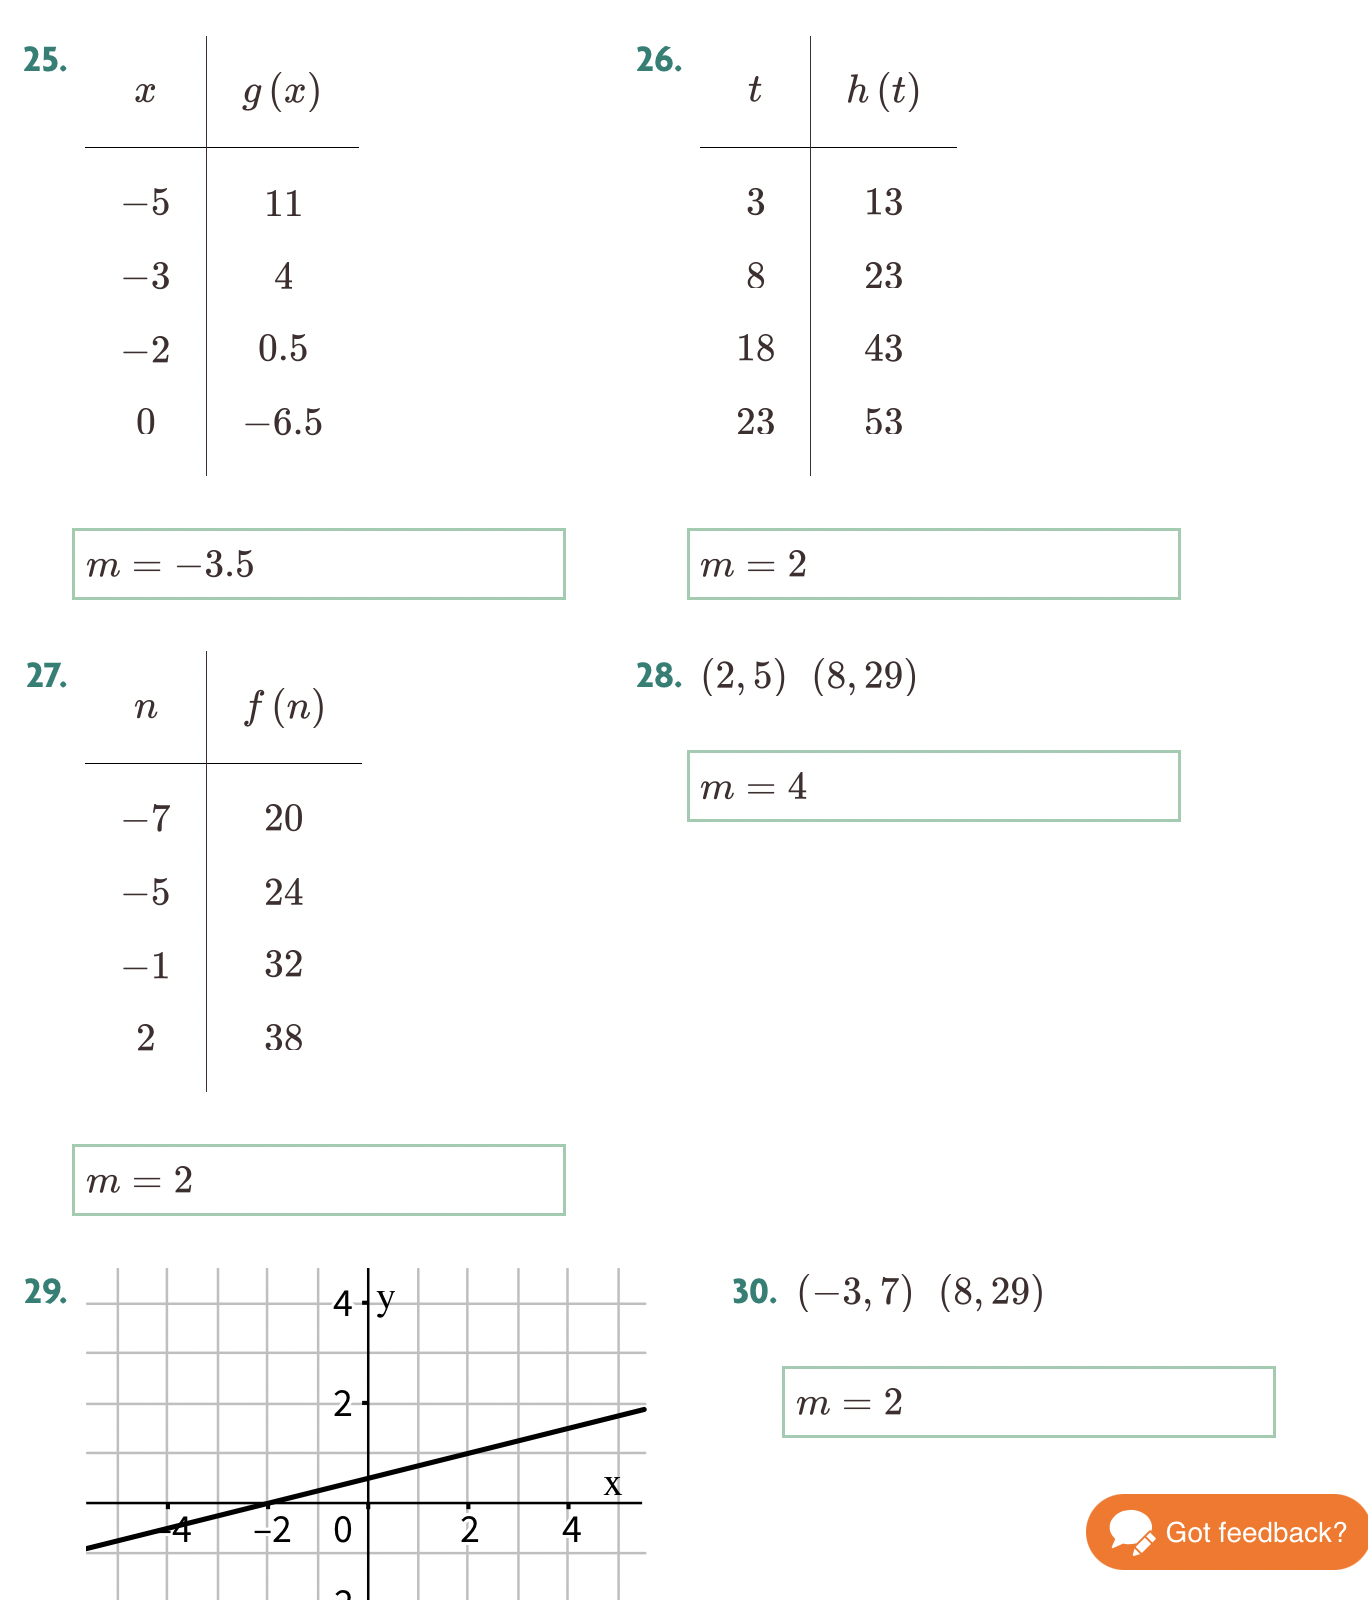

---
Case 1 :
Generate linear sequence and randomly display parts.


---
Case 2 :
Display 2 points

---
Case 3:
Display linear equation

---



In [ ]:
def FindTheSlope_2_3_4(case=1, expr="latex"):
    slope = Rational(getInt(-8,8),2)
    intercept = Rational(getInt(-12,12),2)
    func = LinFunc(slope, intercept)

    if case == 1: # table
        nums = sample(list(range(-15,26)), 4)
        nums.sort()
        problem = func.getTable(nums)
    elif case == 2: # points
        nums = sample(list(range(-15,26)), 2)
        nums.sort()
        problem = f'$({nums[0]},{latexify(func.subs(nums[0]))}), '
        problem += f'({nums[1]},{latexify(func.subs(nums[1]))})$'
    else: # graph
        problem = startGraph(-6,6,-6,6)
        problem += drawCurve(func.expr, -6, 6)
        problem += endGraph()

    answer = '$m =' + latexify(func.slope) + '$'

    return problem, answer

for jj in range(10):
    problem, answer = FindTheSlope_2_3_4(randint(1,3))
    print(problem)
    print(answer)

\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-6,xmax=6,xtick={-10,-5,...,11},ymin=-6,ymax=6,ytick={-10,-5,...,11},]\addplot[red,domain=-6:6] {x/2 - 1/2};\end{axis}\end{tikzpicture}
$m =\frac{1}{2}$
\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-6,xmax=6,xtick={-10,-5,...,11},ymin=-6,ymax=6,ytick={-10,-5,...,11},]\addplot[red,domain=-6:6] {3*x - 2};\end{axis}\end{tikzpicture}
$m =3$
	\begin{center}
		\begin{tabular}{|c|c|}
			\hline
			$x$ & $f(x)$ \\
			\hline
			$-13$ & $\frac{107}{2}$ \\
			\hline
			$-4$ & $\frac{35}{2}$ \\
			\hline
			$5$ & $- \frac{37}{2}$ \\
			\hline
			$19$ & $- \frac{149}{2}$ \\
			\hline
		\end{tabular}
	\end{center}
$m =-4$
$(-10,31), (1,-2)$
$m =-3$
	\begin{center}
		\begin{tabular}{|c|c|}
			\hline
			$x$ & $f(x)$ \\
			\hline
			$6$ & $\frac{41}{2}$ \\
			\hline
			$9$ & $31$ \\
			\hline
			$10$ & $\frac{69}{2}$ \\
			\hline
			$16$ & $\frac{111}{2}$ \\
			\hline
		\end{tabular}
	\end{center}
$m =\frac{7}{2}$
	\begin{center}
		\begin{tabula

## AGS1.2.4.1 - Square Roots

### instruction : Rewrite each of the square roots below by removing repeated factors from under the square root.

#### section 1

primeA
primeB
primeC

---
case 1 :

$ \sqrt{primeA*primeB*primeB}$

---

case 2 :

$ \sqrt{primeA*primeB*primeB*primeC}$

---

case 3 :

$ \sqrt{primeA*primeB*primeB*primeC*primeC}$

---

case 4 :

$ \sqrt{primeA*primeA*primeB*primeB*primeC*primeC}$

---

case 5 :

$ \sqrt{primeA*primeB*primeB*primeC*primeC*primeC}$

---

case 6 :

$ \sqrt{primeA*primeB*primeC}$

---


In [ ]:
def SqrtSimplify(expr='latex'):
    primes = sample([2,3,5,7],3)
    primes.sort()

    case = randint(1,6)
    if case <= 3:
        base = (primes[0]*primes[1]**2) * (primes[2]**(case-1))
    elif case == 4:
        base = (primes[0]*primes[1]*primes[2])**2
    elif case == 5:
        base = (primes[0]*primes[1]**2) * primes[2]**3
    else:
        base = primes[0]*primes[1]*primes[2]
    
    problem = sqrt(base, evaluate=False)
    answer = simplify(problem)

    if expr == 'latex':
        problem = '$' + latex(problem) + '$'
        answer = '$' + latex(answer) + '$'

    return problem, answer

for jj in range(10):
    problem, answer = SqrtSimplify()
    print(problem, r'\\ ')
    print(answer, r'\\ \\')

$\sqrt{30}$ \\ 
$\sqrt{30}$ \\ \\
$\sqrt{50}$ \\ 
$5 \sqrt{2}$ \\ \\
$\sqrt{18}$ \\ 
$3 \sqrt{2}$ \\ \\
$\sqrt{2250}$ \\ 
$15 \sqrt{10}$ \\ \\
$\sqrt{4900}$ \\ 
$70$ \\ \\
$\sqrt{900}$ \\ 
$30$ \\ \\
$\sqrt{50}$ \\ 
$5 \sqrt{2}$ \\ \\
$\sqrt{50}$ \\ 
$5 \sqrt{2}$ \\ \\
$\sqrt{882}$ \\ 
$21 \sqrt{2}$ \\ \\
$\sqrt{900}$ \\ 
$30$ \\ \\


## AGS1.2.4.2 - Fill In The Table - Fractional Exponent

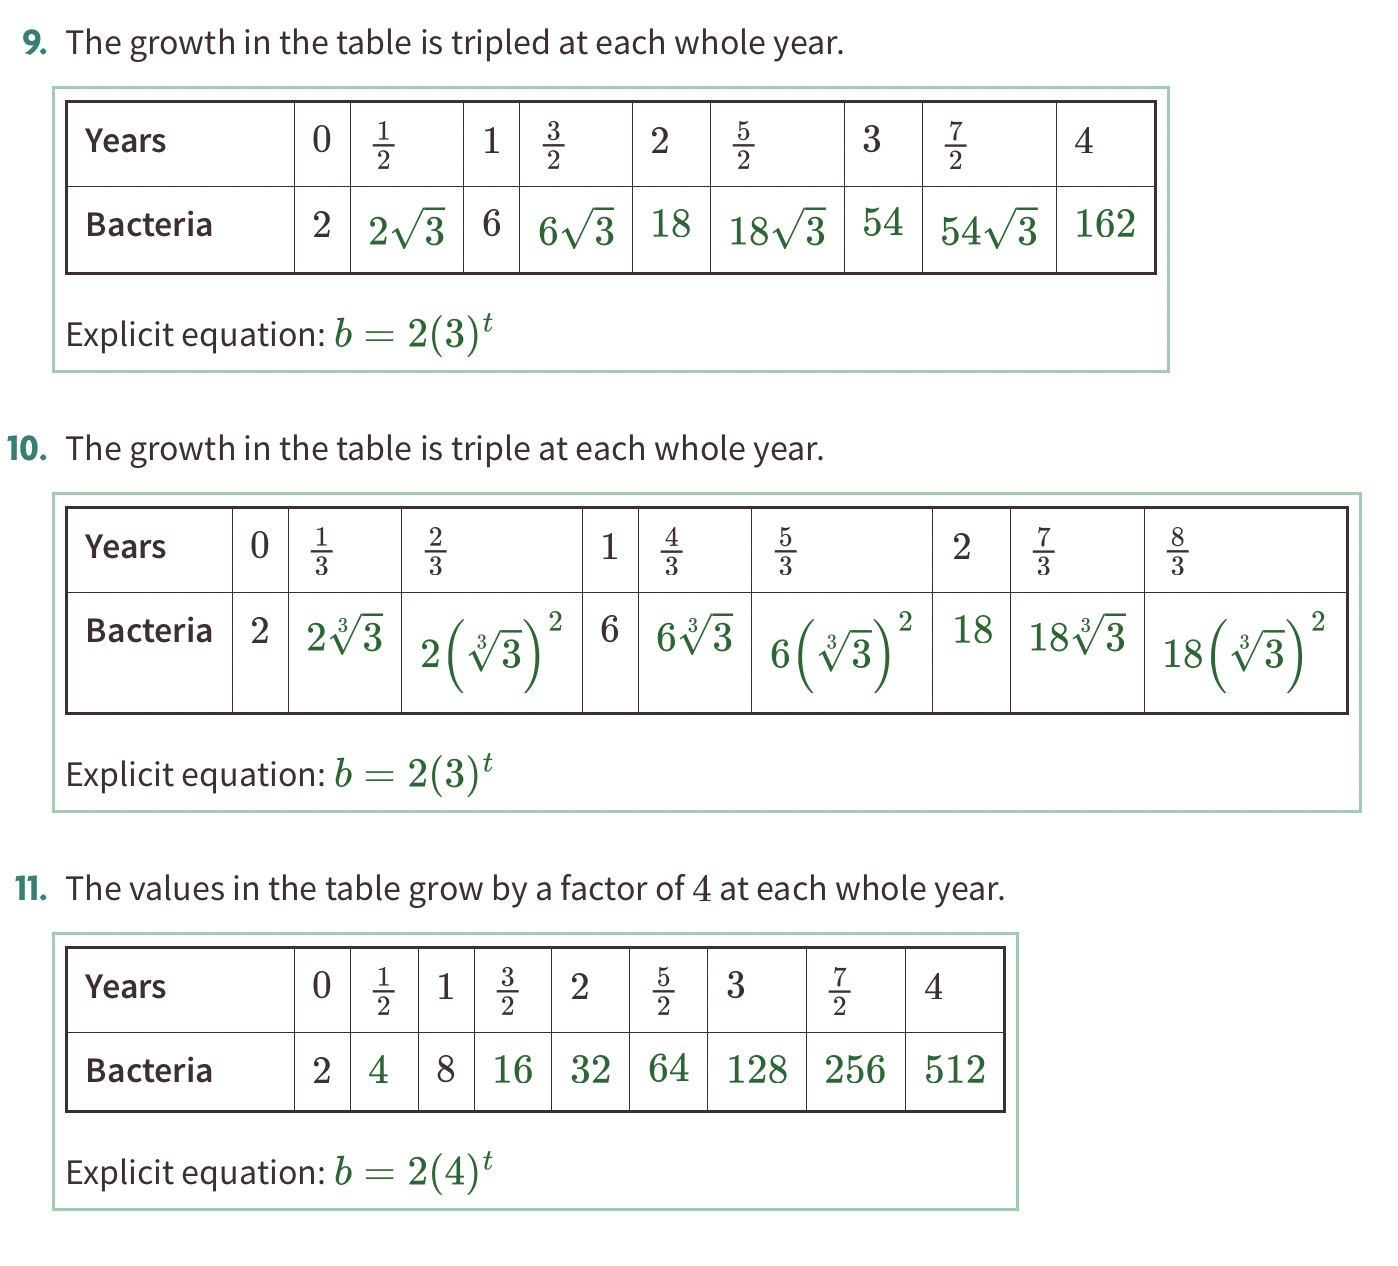


### instruction : Fill in the missing values of the table based on the growth that is described, then create the explicit equation for the table.

#### Section 1

display 3 patterns


Case 1: $\frac{1}{3}$ and up case
The growth in the table is tripled at each whole year.

- problem

| Years | 0 | $\frac{1}{3}$ | $\frac{2}{3}$ | 1 | $\frac{4}{3}$ | $\frac{5}{3}$ | 2 | $\frac{7}{3}$ | $\frac{8}{3}$ |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Bacteria | 2 | |   | 6 |   |  | 18 |   |  |

- answer

| Years | 0 | $\frac{1}{3}$ | $\frac{2}{3}$ | 1 | $\frac{4}{3}$ | $\frac{5}{3}$ | 2 | $\frac{7}{3}$ | $\frac{8}{3}$ |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Bacteria | 2 | $2\sqrt[3]{3}$ | $2\sqrt[3]{3^2}$  | 6 | $6\sqrt[3]{3}$  | $6\sqrt[3]{3^2}$  | 18 | $18\sqrt[3]{3}$  | $18\sqrt[3]{3^2}$  |

- Explicit Equation : $ b = 2(3)^t $

---
case 2 - $\frac{1}{2}$ case

- problem

| Years | 0 | $\frac{1}{2}$ | 1 | $\frac{3}{2}$ | 2 | $\frac{5}{2}$ | 3 | $\frac{7}{2}$ | 4 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Bacteria | 2 |  | 6 |  | 18 |  | 54 |  | 162 |

- answer

| Years | 0 | $\frac{1}{2}$ | 1 | $\frac{3}{2}$ | 2 | $\frac{5}{2}$ | 3 | $\frac{7}{2}$ | 4 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Bacteria | 2 | $2\sqrt{3}$ | 6 | $6\sqrt{3}$ | 18 | $18\sqrt{3}$ | 54 | $54\sqrt{3}$ | 162 |

- Explicit Equation : $b = 2(3)^{t}$
---
case 3 : clean cut case

- problem

| Years | 0 | $\frac{1}{2}$ | 1 | $\frac{3}{2}$ | 2 | $\frac{5}{2}$ | 3 | $\frac{7}{2}$ | 4 |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Bacteria | 2 |  | 8 |  | 32 |  | 128 |  | 512 |

- answer

| Years | 0 | $\frac{1}{2}$ | 1 | $\frac{3}{2}$ | 2 | $\frac{5}{2}$ | 3 | $\frac{7}{2}$ | 4 |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Bacteria | 2 | 4 | 8 | 16 | 32 | 64 | 128 | 256 | 512 |

- Explicit Equation : $b = 2(4)^t$






In [ ]:
def FillInTheTable_2_4_2(case=1, expr='latex'):
    primes = [2,3,5,7]
    ratioDescrips = {2: 'doubled', 3: 'tripled', 4: 'quadrupled'}
    labels = ['Years','Bacteria']

    if case == 1: # 1/3 case
        func = ExpFunc(choice(primes), getInt(-7,7,exclude=[-1,0,1]), variable=t)

        nums = [Rational(jj,3) for jj in range(10)]
        vals = [1] + 3*[0,0,1]
    else: # 1/2 cases (prime ratio and perfect square ratio)
        base = choice(primes) if case==2 else choice(primes)**2
        func = ExpFunc(base, getInt(-7,7,exclude=[-1,0,1]), variable=t)

        nums = [Rational(jj,2) for jj in range(9)]
        vals = [1] + 4*[0,1]
    
    if (func.base in [2,3,4]) and randint(0,1):
        problem = fr'The growth in the table is {ratioDescrips[func.base]} at each whole year. \newline '
    else:
        problem = fr'The values in the table grow by a factor of ${func.base}$ at each whole year. \newline '
    problem += func.getTable(nums, vals, vertical=False, labels=labels)
    
    answer = func.getTable(nums, vertical=False, labels=labels)
    answer += signify(func.getBaseInt(notation='b'))

    return problem, answer

for jj in range(10):
    problem, answer = FillInTheTable_2_4_2(randint(1,3))
    print(problem)
    print(answer, r'\\')

The values in the table grow by a factor of $9$ at each whole year. \newline {\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
			\hline
			Years & $0$ & $\frac{1}{2}$ & $1$ & $\frac{3}{2}$ & $2$ & $\frac{5}{2}$ & $3$ & $\frac{7}{2}$ & $4$ \\
			\hline
			Bacteria & $5$ & \phantom{$15$} & $45$ & \phantom{$135$} & $405$ & \phantom{$1215$} & $3645$ & \phantom{$10935$} & $32805$ \\
			\hline
		\end{tabular}
	\end{center}}
{\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
			\hline
			Years & $0$ & $\frac{1}{2}$ & $1$ & $\frac{3}{2}$ & $2$ & $\frac{5}{2}$ & $3$ & $\frac{7}{2}$ & $4$ \\
			\hline
			Bacteria & $5$ & $15$ & $45$ & $135$ & $405$ & $1215$ & $3645$ & $10935$ & $32805$ \\
			\hline
		\end{tabular}
	\end{center}}$b=5 \cdot 9^{t}$ \\
The growth in the table is doubled at each whole year. \newline {\renewcommand{\arraystretch}{1.5}	\begin{center}
		\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
			\hline
			Y

## AGS1.2.5.1 - Higher Order Roots

### instruction : Rewrite each of the radical expressions to remove perfect square factors from inside the radical.

#### section 1 

primeA = prime (2,3,5,7) maybe mix 6?
primeB = prime (2,3,5,7) maybe mix 6?
primeC = prime (2,3,5)

case 1:

$\sqrt{primeA * primeB * primeA}$

case 2:

$\sqrt{primeA * primeB * primeC}$

case 3:

$\sqrt[3]{primeA * primeA * primeA}$

case 4:

$\sqrt[3]{primeA * primeA * primeA * primeB}$

case 5:

$\sqrt[3]{primeA * primeA * primeA * primeB}$

case 6:

$\sqrt[3]{primeA * primeA * primeA * primeB * primeB}$

case 7:

$\sqrt[3]{primeA * primeA * primeA * primeB * primeB * primeC}$

case 8:

$\sqrt[3]{primeA * primeA * primeA * primeB * primeB * primeB * primeC}$

case 9:

$\sqrt[4]{primeA * primeA * primeA* primeA}$

case 10:

$\sqrt[4]{primeA * primeA * primeA * primeA * primeB}$

case 11:

$\sqrt[4]{primeA *primeA * primeA * primeA * primeB* primeB}$

case 12:

$\sqrt[4]{primeA * primeA * primeA * primeA * primeB * primeB * primeB}$

case 13:

$\sqrt[4]{primeA * primeA * primeA * primeA * primeB * primeB * primeB * primeB * primeC}$

case 14:

$\sqrt[4]{primeA * primeA * primeA * primeA * primeB * primeB * primeB * primeB * primeB * primeC * primeC}$


case 15:

$\sqrt[5]{primeA * primeA * primeA * primeA* primeA}$

case 16:

$\sqrt[5]{primeA * primeA *primeA * primeA * primeA  * primeB}$

case 17:

$\sqrt[5]{primeA * primeA * primeA *primeA * primeA  * primeB* primeB}$

case 18:

$\sqrt[5]{primeA * primeA * primeA * primeA * primeA * primeB * primeB * primeB}$

case 19:

$\sqrt[5]{primeA * primeA * primeA * primeA * primeA * primeB * primeB * primeB * primeB * primeC}$

case 20:

$\sqrt[5]{ primeA * primeA * primeA * primeA * primeA * primeB * primeB * primeB * primeB * primeB * primeC * primeC}$

In [ ]:
def RadicalSimplify(expr='latex'):
    primes = sample([2,3,5,7],3)
    primes.sort()

    root = randint(2,5)
    if root == 2:
        if randint(0,1):
            problem = sqrt(primes[1]*primes[0]**2, evaluate=False)
        else:
            problem = sqrt(primes[0]*primes[1]*primes[2])
    else:
        case = randint(1,6)
        if case <= 4:
            base = (primes[1]**(case-1)) * (primes[0]**root)
        elif case == 5:
            base = primes[2] * (primes[1]**(root-1)) * (primes[0]**root)
        elif case == 6:
            base = (primes[2]**2) * (primes[0]*primes[1])**root
        problem = real_root(base, root, evaluate=False)

    answer = simplify(problem)

    if expr == 'latex':
        problem = '$' + latex(problem) + '$'
        answer = '$' + latex(answer) + '$'

    return problem, answer

for jj in range(10):
    problem, answer = RadicalSimplify()
    print(problem, r'\\ ')
    print(answer, r'\\ \\')

$\sqrt{20}$ \\ 
$2 \sqrt{5}$ \\ \\
$\sqrt{12}$ \\ 
$2 \sqrt{3}$ \\ \\
$\sqrt{42}$ \\ 
$\sqrt{42}$ \\ \\
$1 \sqrt[5]{37209375}$ \\ 
$15 \cdot 7^{\frac{2}{5}}$ \\ \\
$1 \sqrt[5]{864}$ \\ 
$2 \cdot 3^{\frac{3}{5}}$ \\ \\
$\sqrt{20}$ \\ 
$2 \sqrt{5}$ \\ \\
$1 \sqrt[5]{1063125}$ \\ 
$3 \sqrt[5]{4375}$ \\ \\
$1 \sqrt[3]{24}$ \\ 
$2 \sqrt[3]{3}$ \\ \\
$1 \sqrt[3]{4725}$ \\ 
$3 \sqrt[3]{175}$ \\ \\
$\sqrt[4]{16}$ \\ 
$2$ \\ \\


## AGS1.2.5.2 - Evaluate The Function

### Instruction : Find the indicated values for each of the problems.

#### Section 1







----
case 1 : linear equation

$$ f(x) = intA * x - intB $$

- a) Find $f(intC)$

- b) Find $x$ if $f(x) = intD.$

- c) Find $f(\frac{1}{2}).$


----
case 2 : Exponential
$$ f(x) = intA^x * intB $$

- a) Find $f(intC)$

- b) Find $x$ if $f(x) = intD.$

- c) Find $f(\frac{1}{2}).$

----
case 3 : Exponential Equation
$$ I(t) = intA * (floatA)^t $$

- a) Find $I(intC)$

- b) Find $t$ if $I(t) = intD.$

- c) Find $I(\frac{1}{2}).$

----
case 4 : Quadratic
$$ k(x) = intA * x^2 + intB * x + intC $$

- a) Find $k(intC)$

- b) Find $x$ if $k(x) = int.$

- c) Find $k(\frac{1}{2}).$

----
case 5 : Mix
$$ z(x) = intA * x^2 + (intB)^x  $$

- a) Find $z(intC)$

- b) Find $x$ if $z(x) = intC.$

- c) Find $z(\frac{1}{2}).$

In [ ]:
def evaluatethefunction(diff=1, expr="latex"):
  fname = ["f", "k", "z"]
  fnum = randint(0, 2)
  arr = []
  if(diff == 1): #linear
    arr.append(randint(-100,200))
    arr.append(randint(-40,50))

    arr.append(randint(-20, 20))
    arr.append((arr[0] * arr[2]) - (arr[1]))

    arr.append(randint(1, 20))
    arr.append((arr[0] * arr[4]) - (arr[1]))

    arr.append(arr[0] * (0.5) - (arr[1]))

    problem = "Given equation is $" + fname[fnum] + "(x) = " + str(arr[0]) + "*x"
    if(arr[1] < 0):
      problem = problem + " + " + str(arr[1]) + "$"
    else:
      problem = problem + " - " + str(arr[1]) + "$"

  elif (diff == 2): #exp
    arr.append(randint(-9,9))
    arr.append(randint(-9,9))

    arr.append(randint(-3, 3))
    arr.append((arr[0] ** arr[2]) * (arr[1]))

    arr.append(randint(-3, 3))
    arr.append((arr[0] ** arr[2]) * (arr[1]))

    arr.append(arr[0] * (0.5) - (arr[1]))

    problem = "Given equation is $" + fname[fnum] + "(x) = " + str(arr[0]) + "^x * " + str(arr[1]) + "$"
  
  elif (diff == 3): #exp equation
    arr.append(0) 
    arr.append(0) 

    while arr[0] == 0:
      arr[0] = randint(-9,9) #0
    while arr[1] == 0:
      arr[1] = randint(-9,9) #1


    arr.append(randint(1, 3)) #2
    arr.append(arr[0]* (arr[1] ** arr[2]))

    arr.append(randint(1, 3)) #4
    arr.append(arr[0]* (arr[1] ** arr[2]))

    arr.append("{:.2f}".format(arr[0]* (arr[1] ** 0.5)))

  elif (diff == 4): #Quadratic
    arr.append(0) 
    arr.append(0) 
    arr.append(0) 
    arr.append(0) 

    while arr[0] == 0:
      arr[0] = randint(-10,10) #0 intA
    while arr[1] == 0:
      arr[1] = randint(-10,10) #1 intB
    while arr[2] == 0:
      arr[2] = randint(-60,60) #2 intC

    while arr[3] == 0:
      arr[3] = randint(-5,5) #3 x for a
    arr.append( arr[0] * (arr[3] ** 2) + (arr[1] * arr[3]) + arr[2] ) #aa 4

    arr.append(0) 
    while arr[5] == 0:
      arr[5] = randint(-5,5) #5 x for b
    arr.append( arr[0] * (arr[5] ** 2) + (arr[1] * arr[5]) + arr[2] ) #ab 6

    arr.append("{:.2f}".format( arr[0] * ( 0.5 ** 2) + (arr[1] * 0.5) + arr[2] )) #ac 7

    problem = "Given equation is $" + fname[fnum] + "(x) = " + str(arr[0]) + " * x^2 + " + str(arr[1]) + " * x + " + str(arr[2]) + "$"

  elif (diff == 5): #Mix
    arr.append(0) 
    arr.append(0) 

    while arr[0] == 0:
      arr[0] = randint(-5,5) #0 intA
    while arr[1] == 0:
      arr[1] = randint(-10,10) #1 intB

    arr.append(0) 
    while arr[2] == 0:
      arr[2] = randint(1,5) #2 x for a
    arr.append( (arr[0] * (arr[2] ** 2)) + (arr[1] ** arr[2])  )#aa 3

    arr.append(0) 
    while arr[4] == 0:
      arr[4] = randint(1,5) #4 x for b
    arr.append(arr[0] * (arr[4] ** 2) + (arr[1] ** arr[4] )) #ab 5

    arr.append( "{:.2f}".format( arr[0] * (0.5 ** 2) + (arr[1] ** 0.5) ) ) #ac 6

    problem = "Given equation is $" + fname[fnum] + "(x) = " + str(arr[0]) + "* x^2 + " + str(arr[1]) + "^x $"

  if diff == 1 or diff == 2 or diff == 3:
    pa = " a). Find $" + fname[fnum] + "(" + str(arr[2]) + ")"+ "$"
    pb = " b). Find x if $" + fname[fnum] + "(x) = " + str(arr[5]) + "$"
    pc = " c). Find $" + fname[fnum] + "(0.5)$"

    fa = "Answer " + "a. " + str(arr[3]) + " b. " + str(arr[4]) + " c. " + str(arr[6])
  elif diff == 4:
    pa = " a). Find $" + fname[fnum] + "(" + str(arr[3]) + ")"+ "$"
    pb = " b). Find x if $" + fname[fnum] + "(x) = " + str(arr[5]) + "$"
    pc = " c). Find $" + fname[fnum] + "(0.5)$"

    fa = "Answer " + "a. " + str(arr[4]) + " b. " + str(arr[6]) + " c. " + str(arr[7])
  elif diff == 5:
    pa = " a). Find $" + fname[fnum] + "(" + str(arr[2]) + ")"+ "$"
    pb = " b). Find x if $" + fname[fnum] + "(x) = " + str(arr[4]) + "$"
    pc = " c). Find $" + fname[fnum] + "(0.5)$"

    fa = "Answer " + "a. " + str(arr[3]) + " b. " + str(arr[5]) + " c. " + str(arr[6])

  return problem + "\newline" + pa + "\newline" + pb + "\newline" + pc, fa

    

('Given equation is $f(x) = -5* x^2 + -8^x $\newline a). Find $f(3)$\newline b). Find x if $f(x) = 5$\newline c). Find $f(0.5)$', 'Answer a. -557 b. -32893 c. -1.25+2.83j')


## AGS1.2.6.1 - Percent Increase / Decrease



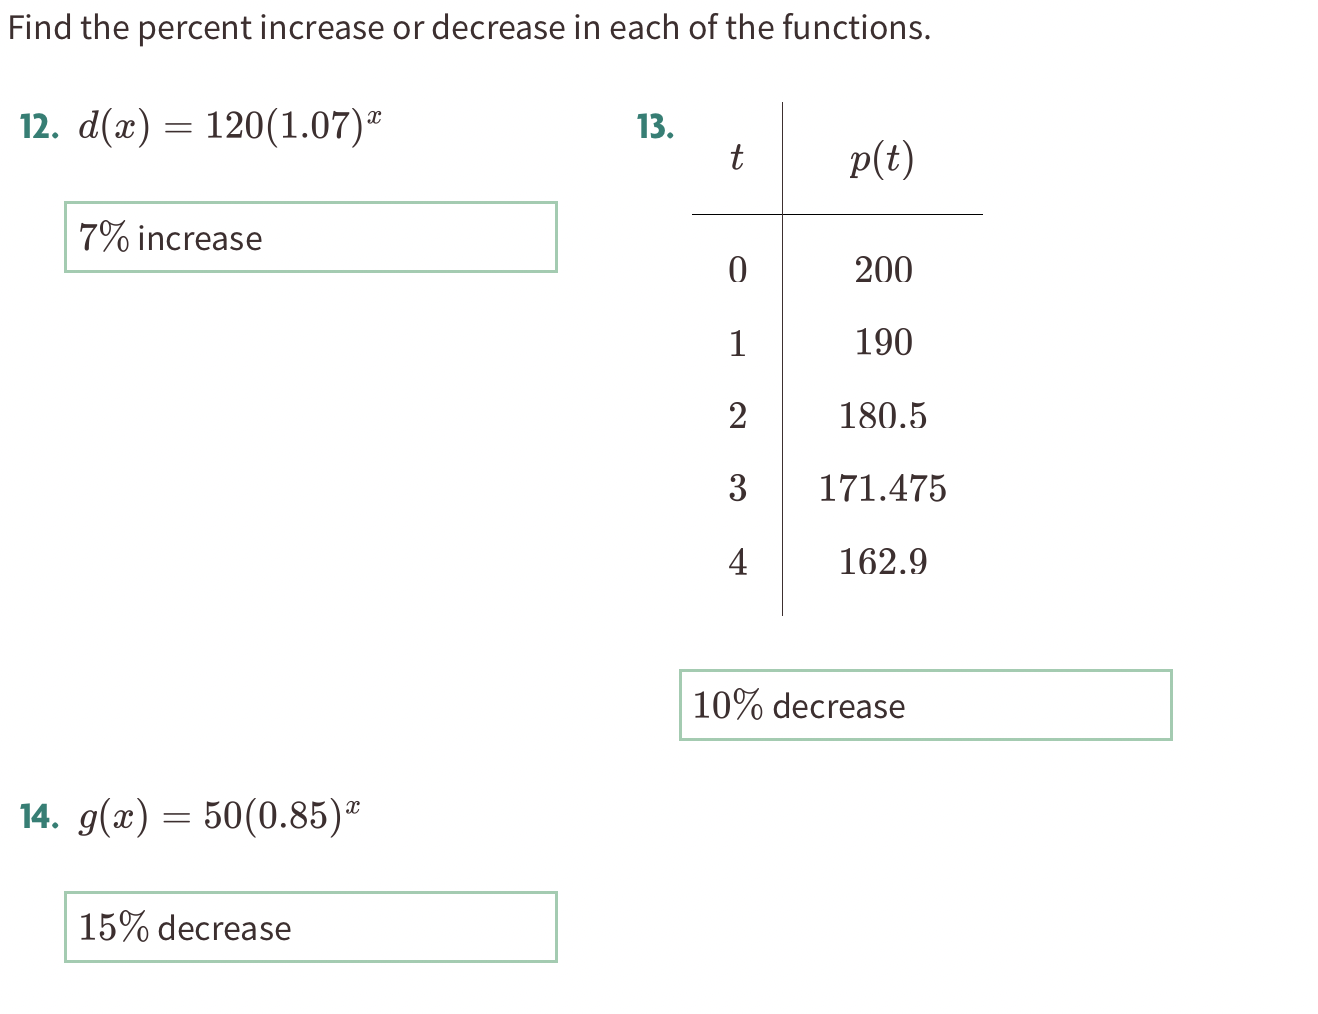

### instruction : Find the percent increase or decrease in each of the functions.

In [ ]:
import pandas as pd

def perequation():
  fname = ["f", "k", "z", "g", "d", "t"]
  fnum = randint(0, 5)
 
  frontnum = randint(15, 54)
  pm = randint(0, 1)
  if(pm == 0):
    ans = randint(1, 100)
    answer = str(ans) + "\\% decrease"
  elif(pm == 1):
    ans = randint(1, 100) + 100
    answer = str(ans - 100) + "\\% increase"

  pro = ans / 100
  problem = "$" + fname[fnum] + "(x) = " + str(frontnum) + "(" + str(pro) + ")^x$"

  return problem, answer

def pertable():
  fname = ["f", "k", "z", "g", "d", "t"]
  fnum = randint(0, 5)

  frontnum = randint(30, 200)
  pm = randint(0, 1)
  if(pm == 0):
    ans = randint(1, 100)
    answer = str(ans) + "\\% decrease"
  elif(pm == 1):
    ans = randint(1, 100) + 100
    answer = str(ans - 100) + "\\% increase"

  tablenum = []
  tablenum.append(frontnum)
  for i in range(1, 5):
    frontnum = (frontnum * (ans/100))
    tablenum.append( "{:.2f}".format(frontnum) )

  problem = "\\begin{tabular}{| C | C |}\n \\hline"
  problem = problem + "\hline x & " + fname[fnum] + "(x)\\ "
  for i in range(5):
    problem = problem + str(i) + "&" + str(tablenum[i]) + "\\\\ \n \\hline"
  problem = problem + "\n\end{tabular}"

  return problem, answer



('\\hline x & d(x)\\ 0&189\\\\ \n \\hline1&238.14\\\\ \n \\hline2&300.06\\\\ \n \\hline3&378.07\\\\ \n \\hline4&476.37\\\\ \n \\hline\n\\end{tabular}', '26\\% increase')


## AGS1.2.6.2 - Monthly / Exponential



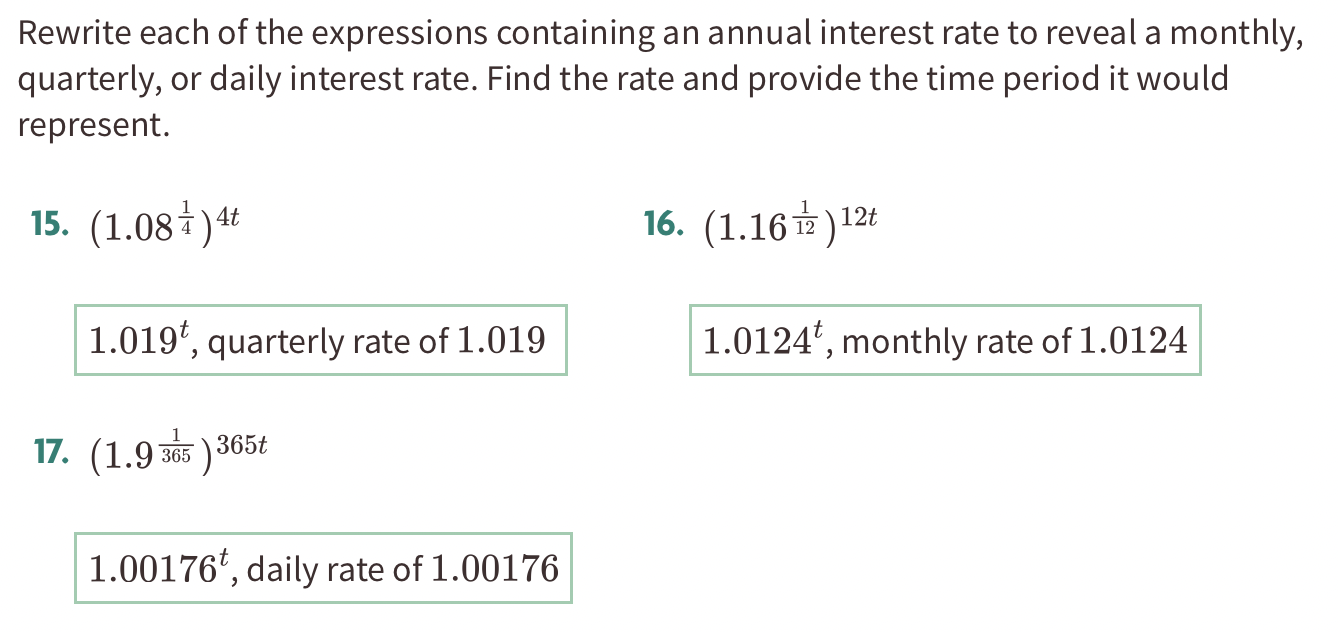

### instruction : Rewrite each of the expressions containing an annual interest rate to reveal a monthly, quarterly, or daily interest rate. Find the rate and provide the time period it would represent.


---
Frequency = {1:"Annually",4:"Quarterly", 6:"Semi-Annually",12:"Monthly",52:"Weekly",365:"Daily"}

flaotA = 0.00~0.99

- Case1: Mix (Randomly generate)
---


In [ ]:
def monthlyexp(diff = 1, expr = "latex"):
  ndict = [1, 4, 6, 12, 52, 365]
  sdict = ["annually", "quarterly", "semi-annually", "monthly", "weekly", "daily"]
  num = randint(0, 6)

  if diff == 1: #natural number
    inta = randint(1, 150)
    ans = "{:.4f}".format(inta ** (1 / ndict[num]))
  elif diff == 2: #decimal
    inta = randint(1, 100) / 100 + 1
    ans = "{:.4f}".format(inta ** (1 / ndict[num]))
  
  problem = "$(" + str(inta) + "^{\\frac{1}{" + str(ndict[num]) + "}})^{" + str(ndict[num]) +"t}$"
  answer = "$" + str(ans) + "^t$, " + sdict[num] + " rate of " + str(ans) 

  return problem, answer

print(monthlyexp(2))

('$(1.05^{\\frac{1}{12}})^{12t}$', '$1.0041^t$, monthly rate of 1.0041')
